## Recipe 35 Box Cox Transformers

In [72]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

# with open-source packages
from sklearn.preprocessing import PowerTransformer
from feature_engine import transformation as vt
# from feature_engine.variable_transformers import BoxCoxTransformer

In [73]:
# boston.csv in local file 
data = pd.read_csv('boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


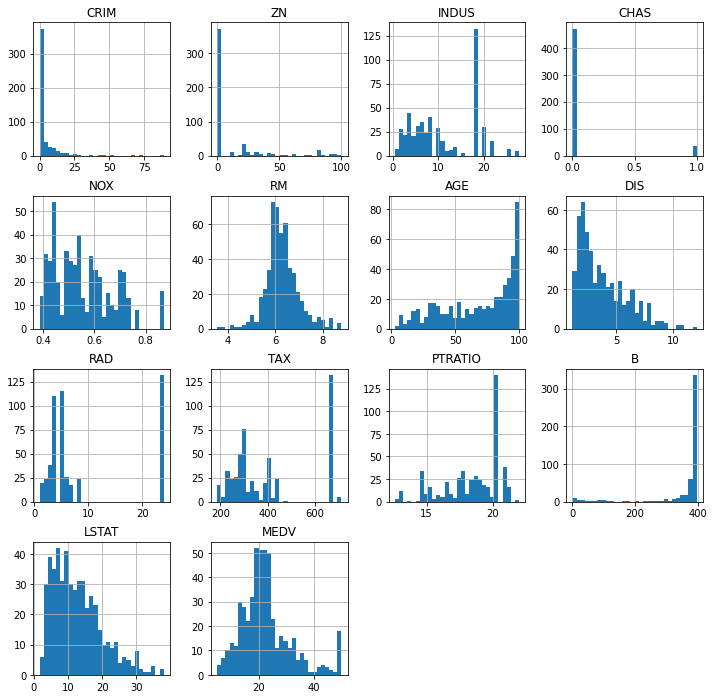

In [74]:
# plot the histogram to inspect variable distributions (not in book)

data.hist(bins=30, figsize=(12,12))
plt.show()

In [75]:
# plot histogram and Q-Q plots to have a look at the variable distribution
# (not included in this recipe, but present in recipe 1)

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

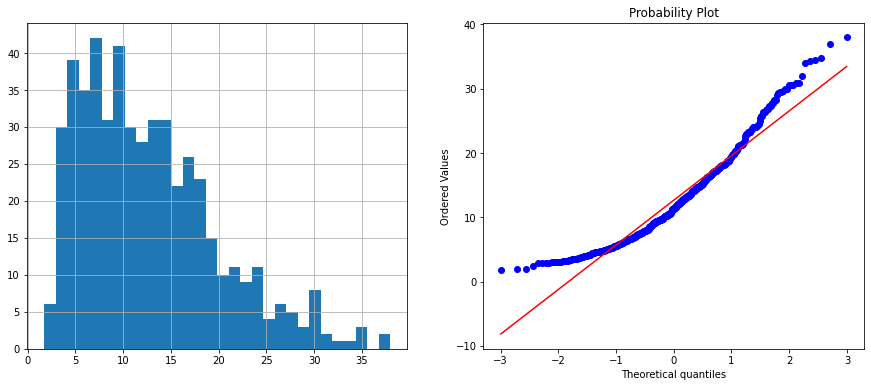

In [76]:
# check original distribution (not in book chapter)

diagnostic_plots(data, 'LSTAT')

## Box-Cox transformation with SciPy

In [77]:
# make a copy of the dataframe where we will store the modified
# variables

data_tf = data.copy()

Optimal λ:  0.22776736893884023


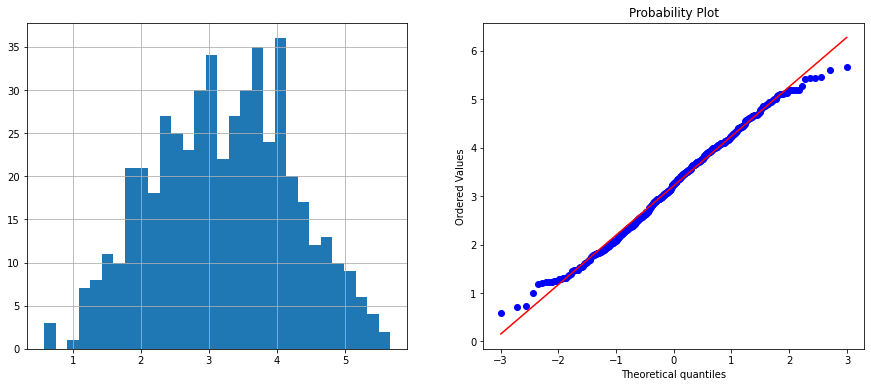

In [78]:
# apply the Box-Cox transformation to variable LSTAT
data_tf['LSTAT'], param = stats.boxcox(data['LSTAT']) 

# print the optimal lambda found for LSTAT
print('Optimal λ: ', param)

# visualize the transformed variable (not in book chapter)
diagnostic_plots(data_tf, 'LSTAT')

## Box-Cox transformation with Scikit-learn

In [79]:
# initialize the transformer with box-cox
transformer = PowerTransformer(method='box-cox', standardize=False)

In [80]:
# make list with columns to transform
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

In [81]:
# fit transformer to slice of dataframe with indicated variables
# transformer will learn the lambdas
transformer.fit(data[cols])

PowerTransformer(method='box-cox', standardize=False)

In [82]:
# lambdas are stored in a transformer attribute (not in book)
transformer.lambdas_

array([ 0.22776737, -0.91561209, -0.15560583,  0.44895979])

In [83]:
# transform slice of dataframe with indicated variables
# returns NumPy array
data_tf = transformer.transform(data[cols])

In [84]:
# transform NumPy array to pandas dataframe
data_tf = pd.DataFrame(data_tf, columns=cols)

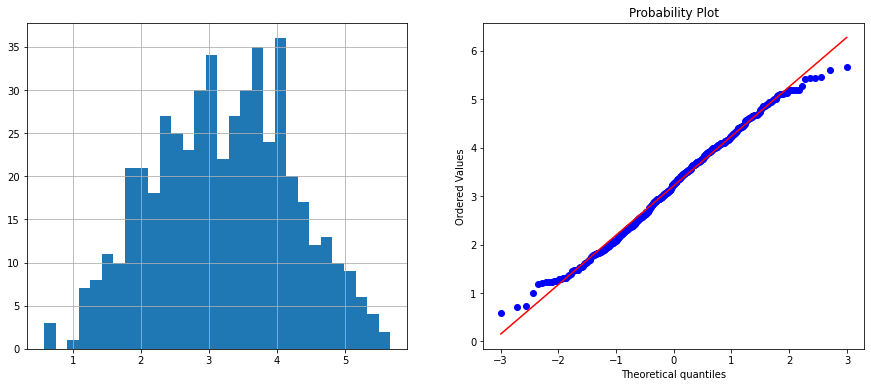

In [85]:
# visualize transformation (not in book)
diagnostic_plots(data_tf, 'LSTAT')

## Box-Cox transformation with Feature-engine

In [86]:
# initialize the transformer with a group of variables to transform
bct = vt.BoxCoxTransformer(variables = ['LSTAT', 'NOX', 'DIS', 'RM'])

# fit transformer to the data set
bct.fit(data)

BoxCoxTransformer(variables=['LSTAT', 'NOX', 'DIS', 'RM'])

In [87]:
# transform the indicated variables in our dataframe
# returns a new dataframe

data_tf = bct.transform(data)

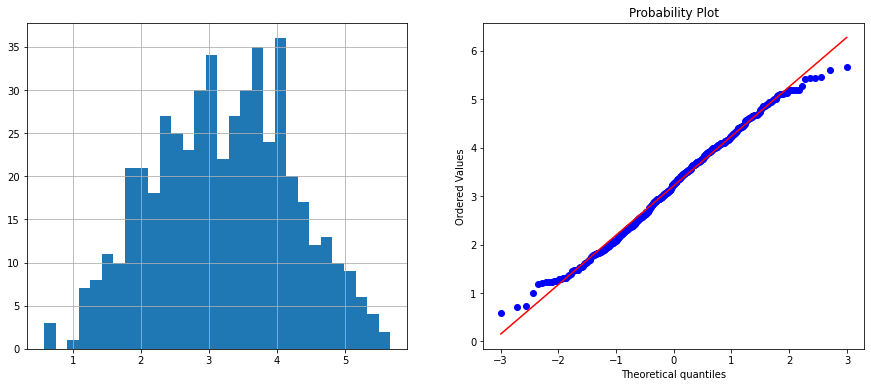

In [88]:
# visualize the distribution (not in book)
diagnostic_plots(data_tf, 'LSTAT')

In [89]:
# the transformer stores the optimal parameter for each 
# variable in a dictionary in its attribute lambda_dict_

bct.lambda_dict_

{'LSTAT': 0.22776736893884023,
 'NOX': -0.9156120907279849,
 'DIS': -0.15560583167193484,
 'RM': 0.4489597919730037}

## Recipe36 - Yeo Johnson transformer

In [90]:
# boston.csv in local file 
data = pd.read_csv('boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


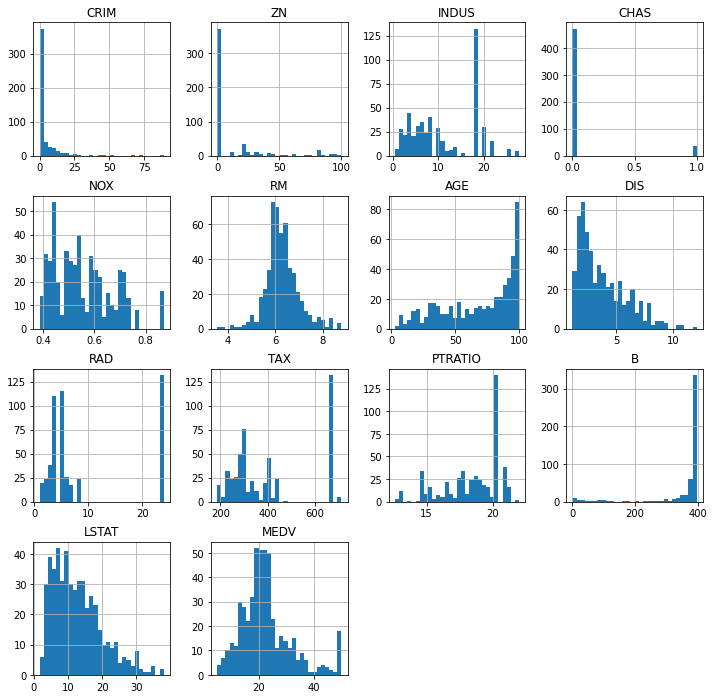

In [91]:
# plot the histogram to inspect variable distributions (not in book)

data.hist(bins=30, figsize=(12,12))
plt.show()

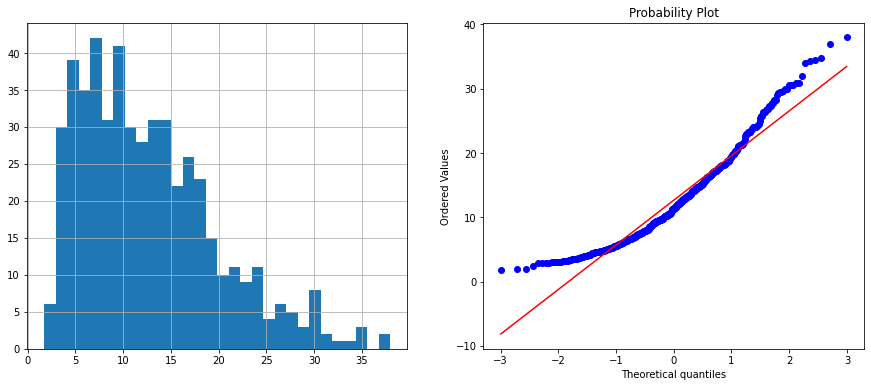

In [92]:
# check original distribution (not in book)

diagnostic_plots(data, 'LSTAT')

## Yeo-Johnson transformation with SciPy

In [93]:
# make a copy of the dataframe where we will store the modified
# variables

data_tf = data.copy()

Optimal λ:  0.15370552301825943


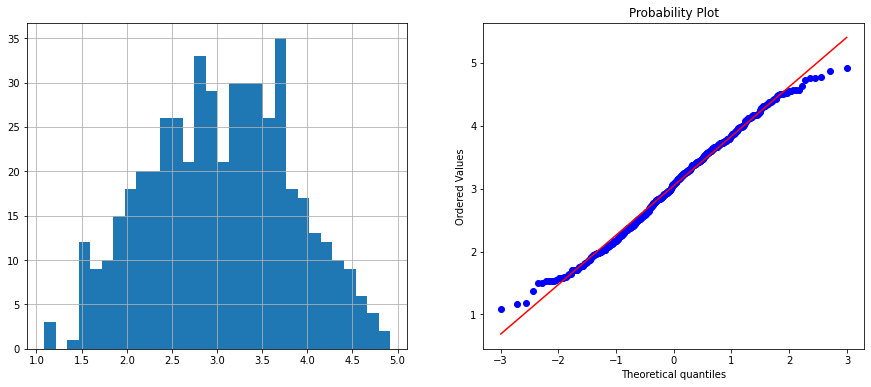

In [94]:
# apply the Yeo_johnson transformation to the variable LSTAT

data_tf['LSTAT'], param = stats.yeojohnson(data['LSTAT']) 

# print the optimal lambda selected for this variable
print('Optimal λ: ', param)

# visualize the transformation (not in book)
diagnostic_plots(data_tf, 'LSTAT')

## Ye-Johnson transformation with Scikit-learn

In [95]:
# initialize a transformer with yeo-johnson
transformer = PowerTransformer(method='yeo-johnson', standardize=False)

In [96]:
# select variables to transform in a list
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

In [97]:
# fit transformer to the slice of data with the indicated variables
transformer.fit(data[cols])

PowerTransformer(standardize=False)

In [98]:
# the transformer stores the learned lambdas in its attribute
transformer.lambdas_

array([ 0.15370552, -3.97371104, -0.44887192,  0.33298652])

In [99]:
# transform indicated variables
data_tf = transformer.transform(data[cols])

In [100]:
# capture NumPy array into dataframe
data_tf = pd.DataFrame(data_tf, columns=cols)

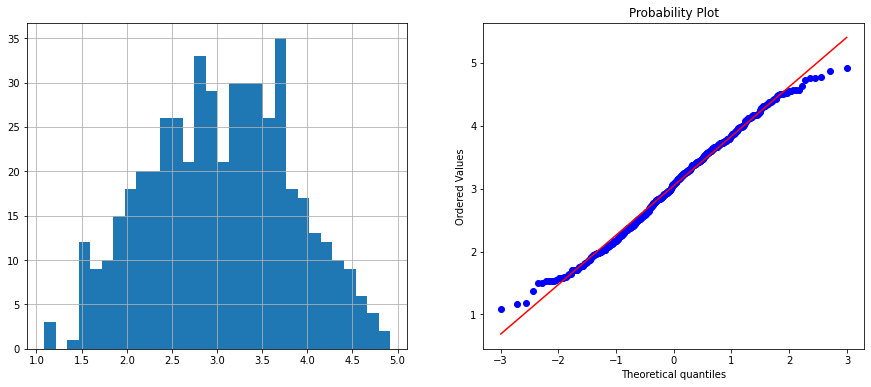

In [101]:
# plot the distribution (not in book)
diagnostic_plots(data_tf, 'LSTAT')

## Yeo-Johnson transformation with Feature-engine

In [102]:
# initialize the transformer with a subset of variables to transform
yjt = vt.YeoJohnsonTransformer(variables = ['LSTAT', 'NOX', 'DIS', 'RM'])

# fit transformer to the dataframe
yjt.fit(data)

YeoJohnsonTransformer(variables=['LSTAT', 'NOX', 'DIS', 'RM'])

In [103]:
# transform indicated variables

data_tf = yjt.transform(data)

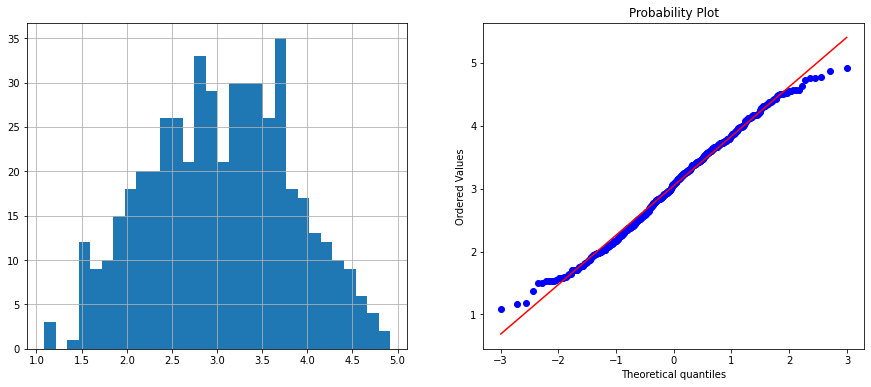

In [104]:
# make diagnostic plot of transformed variable (not in book)
diagnostic_plots(data_tf, 'LSTAT')

In [105]:
# the transformer stores the learned parameters for each variable
# in a dictionary as an attribute

yjt.lambda_dict_

{'LSTAT': 0.15370552301825943,
 'NOX': -3.9737110448770623,
 'DIS': -0.4488719212889845,
 'RM': 0.3329865194470187}

## Recipe 37 - Equal width discretizer 

In [106]:
from sklearn.model_selection import train_test_split


# for discretization
from sklearn.preprocessing import KBinsDiscretizer

from feature_engine.discretisation import EqualWidthDiscretiser

In [107]:
# boston.csv in local file 
data = pd.read_csv('boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [108]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

## Equal-width discretization with pandas

First we need to determine the interval edges or limits.

In [109]:
# let's capture the value range of the variable LSTAT

lstat_range = X_train['LSTAT'].max() - X_train['LSTAT'].min()

lstat_range

35.25

In [110]:
# let's divide the range into 10 equal-width bins

lstat_range / 10

3.525

In [111]:
# now let's capture the lower and upper boundaries

min_value = int(np.floor( X_train['LSTAT'].min()))
max_value = int(np.ceil( X_train['LSTAT'].max()))

# let's round the bin width
inter_width = int(lstat_range / 10)

min_value, max_value, inter_width

(1, 37, 3)

In [112]:
# let's capture the interval limits, so we can pass them to the pandas cut()
# function to generate the bins

intervals = [i for i in range(min_value, max_value+inter_width, inter_width)]

intervals

[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37]

In [113]:
# discretise LSTAT

X_train['lstat_disc'] = pd.cut(x=X_train['LSTAT'],
                               bins=intervals,
                               include_lowest=True)


print(X_train[['LSTAT', 'lstat_disc']].head(10))

     LSTAT    lstat_disc
141  34.41  (34.0, 37.0]
272   7.73   (7.0, 10.0]
135  16.96  (16.0, 19.0]
298   4.97    (4.0, 7.0]
122  17.93  (16.0, 19.0]
22   18.72  (16.0, 19.0]
68   13.09  (13.0, 16.0]
20   21.02  (19.0, 22.0]
437  26.45  (25.0, 28.0]
14   10.26  (10.0, 13.0]


In [114]:
# let's check the number of observations per bin

X_train['lstat_disc'].value_counts()

(4.0, 7.0]      67
(7.0, 10.0]     63
(10.0, 13.0]    49
(16.0, 19.0]    45
(13.0, 16.0]    44
(0.999, 4.0]    28
(19.0, 22.0]    21
(22.0, 25.0]    17
(28.0, 31.0]     9
(25.0, 28.0]     7
(34.0, 37.0]     4
(31.0, 34.0]     0
Name: lstat_disc, dtype: int64

Text(0, 0.5, 'Number of observations per bin')

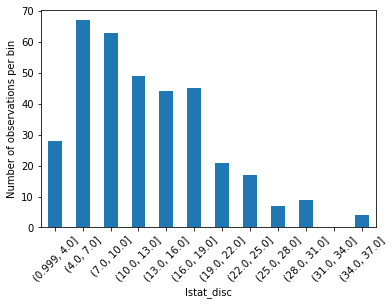

In [115]:
# let's plot the number of observations per bin

X_train.groupby('lstat_disc')['LSTAT'].count().plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

In [116]:
# let's discretise the variables in the test set

X_test['lstat_disc'] = pd.cut(x=X_test['LSTAT'],
                              bins=intervals,
                              include_lowest=True)

X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,lstat_disc
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34,"(7.0, 10.0]"
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,"(7.0, 10.0]"
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50,"(10.0, 13.0]"
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77,"(19.0, 22.0]"
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34,"(10.0, 13.0]"


Text(0, 0.5, 'Number of observations per bin')

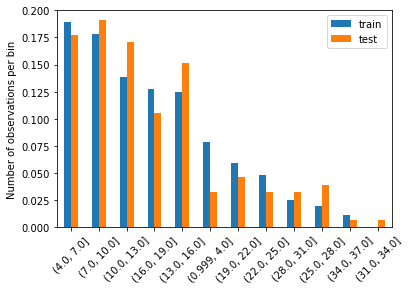

In [117]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set
# let's see that below

# determine proportion of observations in each bin
t1 = X_train['lstat_disc'].value_counts() / len(X_train)
t2 = X_test['lstat_disc'].value_counts() / len(X_test)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

# Equal-width discretization with Feature-engine

In [118]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [119]:
# with feature engine we can automate the process for many variables
# in one line of code

disc = EqualWidthDiscretiser(bins=10, variables = ['LSTAT', 'DIS', 'RM'])

disc.fit(X_train)

EqualWidthDiscretiser(variables=['LSTAT', 'DIS', 'RM'])

In [120]:
# the limits of the intervals are stored in the binner_dict_

disc.binner_dict_

{'LSTAT': [-inf,
  5.255,
  8.78,
  12.305,
  15.83,
  19.355,
  22.88,
  26.405,
  29.93,
  33.455,
  inf],
 'DIS': [-inf,
  2.26943,
  3.36466,
  4.459890000000001,
  5.5551200000000005,
  6.65035,
  7.745580000000001,
  8.840810000000001,
  9.936040000000002,
  11.031270000000003,
  inf],
 'RM': [-inf,
  4.0828999999999995,
  4.6048,
  5.1267,
  5.6486,
  6.1705,
  6.692399999999999,
  7.2143,
  7.736199999999999,
  8.258099999999999,
  inf]}

In [121]:
# transform train and test sets

train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

Text(0, 0.5, 'Number of observations per bin')

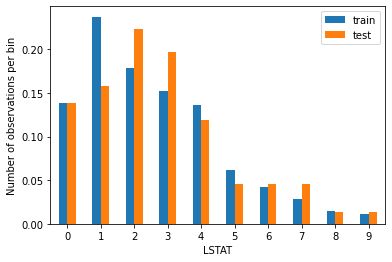

In [122]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

# LSTAT
# calculate proportion of observations per interval
t1 = train_t.groupby(['LSTAT'])['LSTAT'].count() / len(train_t)
t2 = test_t.groupby(['LSTAT'])['LSTAT'].count() / len(test_t)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

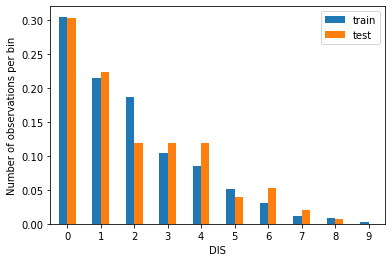

In [123]:
# DIS

t1 = train_t.groupby(['DIS'])['DIS'].count() / len(train_t)
t2 = test_t.groupby(['DIS'])['DIS'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

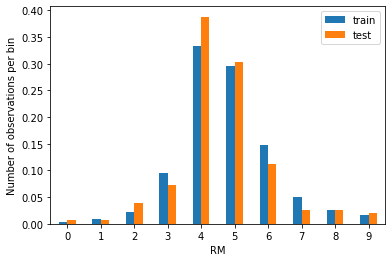

In [124]:
# RM

t1 = train_t.groupby(['RM'])['RM'].count() / len(train_t)
t2 = test_t.groupby(['RM'])['RM'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

## Equal-width discretization with Scikit-Learn

In [125]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [126]:
# let's set up an equal-width discretizer into 10 intervals

disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

# let's fit the discretizer so it learns the interval limits
disc.fit(X_train[['LSTAT', 'DIS', 'RM']])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')

In [127]:
# the interval limits are stored in the bin_edges_attribute

disc.bin_edges_

array([array([ 1.73 ,  5.255,  8.78 , 12.305, 15.83 , 19.355, 22.88 , 26.405,
              29.93 , 33.455, 36.98 ])                                       ,
       array([ 1.1742 ,  2.26943,  3.36466,  4.45989,  5.55512,  6.65035,
               7.74558,  8.84081,  9.93604, 11.03127, 12.1265 ])         ,
       array([3.561 , 4.0829, 4.6048, 5.1267, 5.6486, 6.1705, 6.6924, 7.2143,
              7.7362, 8.2581, 8.78  ])                                       ],
      dtype=object)

In [128]:
# let's transform the train set, remember that Sklearn returns Numpy arrays
train_t = disc.transform(X_train[['LSTAT', 'DIS', 'RM']])

# transform array to dataframe
train_t = pd.DataFrame(train_t, columns = ['LSTAT', 'DIS', 'RM'])

train_t.head()

,LSTAT,DIS,RM
0,9.0,0.0,2.0
1,1.0,2.0,5.0
2,4.0,0.0,5.0
3,0.0,6.0,5.0
4,4.0,0.0,4.0


In [129]:
# same thing for test set

test_t = disc.transform(X_test[['LSTAT', 'DIS', 'RM']])

test_t = pd.DataFrame(test_t, columns = ['LSTAT', 'DIS', 'RM'])

Text(0, 0.5, 'Number of observations per bin')

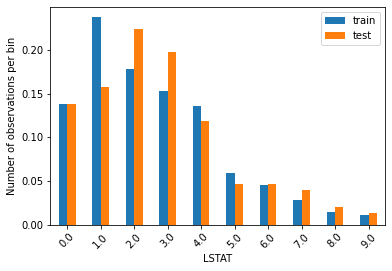

In [130]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

# LSTAT

t1 = train_t.groupby(['LSTAT'])['LSTAT'].count() / len(train_t)
t2 = test_t.groupby(['LSTAT'])['LSTAT'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

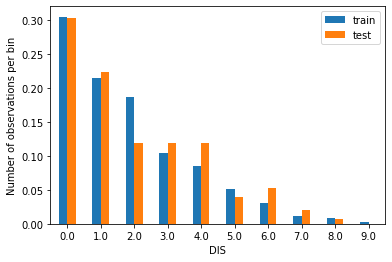

In [131]:
# DIS

t1 = train_t.groupby(['DIS'])['DIS'].count() / len(train_t)
t2 = test_t.groupby(['DIS'])['DIS'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

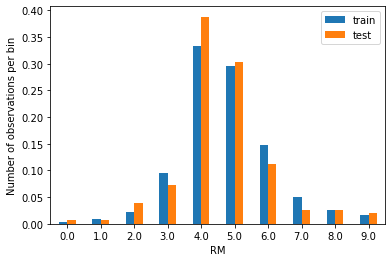

In [132]:
# RM

t1 = train_t.groupby(['RM'])['RM'].count() / len(train_t)
t2 = test_t.groupby(['RM'])['RM'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

## Recipe 38 - Equal Frequency Discretization

In [133]:
from sklearn.model_selection import train_test_split

# for discretization
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisation import EqualFrequencyDiscretiser


In [134]:
# boston.csv in local file 
data = pd.read_csv('boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [135]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

## Equal-frequency discretization with pandas

The interval limits are the quantile limits. We can find those out with pandas qcut.

In [136]:
# let's use pandas qcut (quantile cut) and I indicate that
# we want 10 bins.

# retbins = True indicates that I want to capture the limits
# of the intervals (so I can then use them to cut the test set)

X_train['lstat_disc'], intervals = pd.qcut(
    X_train['LSTAT'], 10, labels=None, retbins=True, precision=3, duplicates='raise')

In [137]:
# let's visualize the interval edges

intervals

array([ 1.73 ,  4.623,  6.202,  7.528,  9.5  , 11.16 , 13.26 , 15.565,
       18.06 , 22.453, 36.98 ])

In [138]:
# let's have a look at the result: compare original
# and discretized variable

print(X_train[['LSTAT', 'lstat_disc']].head(10))

     LSTAT       lstat_disc
141  34.41  (22.453, 36.98]
272   7.73     (7.528, 9.5]
135  16.96  (15.565, 18.06]
298   4.97   (4.623, 6.202]
122  17.93  (15.565, 18.06]
22   18.72  (18.06, 22.453]
68   13.09   (11.16, 13.26]
20   21.02  (18.06, 22.453]
437  26.45  (22.453, 36.98]
14   10.26     (9.5, 11.16]


In [139]:
# let's check the percentage of observations per interval
# they should be roughly the same

X_train['lstat_disc'].value_counts() / len(X_train)

(7.528, 9.5]       0.104520
(1.729, 4.623]     0.101695
(13.26, 15.565]    0.101695
(15.565, 18.06]    0.101695
(22.453, 36.98]    0.101695
(4.623, 6.202]     0.098870
(6.202, 7.528]     0.098870
(11.16, 13.26]     0.098870
(9.5, 11.16]       0.096045
(18.06, 22.453]    0.096045
Name: lstat_disc, dtype: float64

In [140]:
# and now let's discretise LSTAT in the test set
# note how we now use pandas cut() instead of qcut() and
# pass the intervals we determined for the train set

X_test['lstat_disc'] = pd.cut(x = X_test['LSTAT'], bins=intervals)

In [141]:
# let's check the percentage of observations per interval
# should be roughly the same

X_test['lstat_disc'].value_counts() / len(X_test)

(7.528, 9.5]       0.131579
(13.26, 15.565]    0.118421
(22.453, 36.98]    0.118421
(11.16, 13.26]     0.111842
(4.623, 6.202]     0.098684
(15.565, 18.06]    0.098684
(9.5, 11.16]       0.092105
(1.73, 4.623]      0.085526
(18.06, 22.453]    0.078947
(6.202, 7.528]     0.059211
Name: lstat_disc, dtype: float64

In [142]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,lstat_disc
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,"(22.453, 36.98]"
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73,"(7.528, 9.5]"
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96,"(15.565, 18.06]"
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97,"(4.623, 6.202]"
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93,"(15.565, 18.06]"


Text(0, 0.5, 'Number of observations per bin')

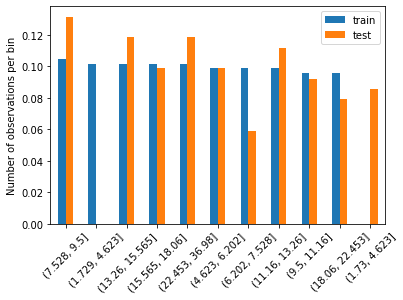

In [143]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set
# let's see that below

# determine proportion of observations per interval
t1 = X_train['lstat_disc'].value_counts() / len(X_train)
t2 = X_test['lstat_disc'].value_counts() / len(X_test)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

## Equal-frequency discretization with Feature-engine

In [144]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [145]:
# with feature engine we can automate the process for many variables
# in one line of code

disc = EqualFrequencyDiscretiser(q=10, variables = ['LSTAT', 'DIS', 'RM'])

disc.fit(X_train)

EqualFrequencyDiscretiser(variables=['LSTAT', 'DIS', 'RM'])

In [146]:
# in the binner dict, we can see the limits of the intervals
# for each variable

disc.binner_dict_

{'LSTAT': [-inf,
  4.623,
  6.202,
  7.5280000000000005,
  9.5,
  11.16,
  13.260000000000002,
  15.565000000000005,
  18.06,
  22.452999999999996,
  inf],
 'DIS': [-inf,
  1.66132,
  1.9793,
  2.26121,
  2.6477400000000006,
  3.2157,
  3.7965,
  4.45352,
  5.40702,
  6.8147,
  inf],
 'RM': [-inf,
  5.5783000000000005,
  5.8532,
  5.9628000000000005,
  6.1048,
  6.2155000000000005,
  6.3946,
  6.5632,
  6.794,
  7.185,
  inf]}

In [147]:
# transform train and test sets

train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

Text(0, 0.5, 'Number of observations per bin')

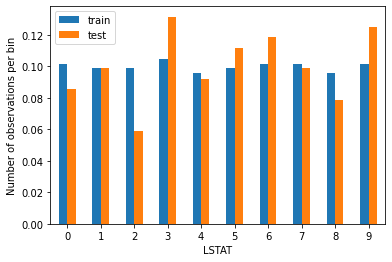

In [148]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

# LSTAT

t1 = train_t.groupby(['LSTAT'])['LSTAT'].count() / len(train_t)
t2 = test_t.groupby(['LSTAT'])['LSTAT'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

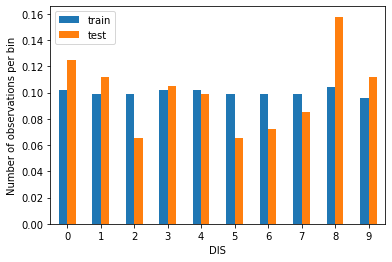

In [149]:
# DIS

t1 = train_t.groupby(['DIS'])['DIS'].count() / len(train_t)
t2 = test_t.groupby(['DIS'])['DIS'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

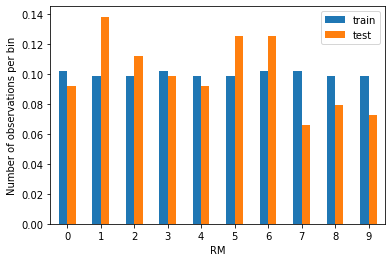

In [150]:
# RM

t1 = train_t.groupby(['RM'])['RM'].count() / len(train_t)
t2 = test_t.groupby(['RM'])['RM'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

## Equal-frequency discretization with Scikit-Learn

In [151]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [152]:
# let's set up a discretizer based on quantiles to sort values in 10 bins

disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

# fit the discretizer so that it learns the interval edges
disc.fit(X_train[['LSTAT', 'DIS', 'RM']])

KBinsDiscretizer(encode='ordinal', n_bins=10)

In [153]:
# the interval edges are stored in a transformer attribute:

disc.bin_edges_

array([array([ 1.73 ,  4.623,  6.202,  7.528,  9.5  , 11.16 , 13.26 , 15.565,
              18.06 , 22.453, 36.98 ])                                       ,
       array([ 1.1742 ,  1.66132,  1.9793 ,  2.26121,  2.64774,  3.2157 ,
               3.7965 ,  4.45352,  5.40702,  6.8147 , 12.1265 ])         ,
       array([3.561 , 5.5783, 5.8532, 5.9628, 6.1048, 6.2155, 6.3946, 6.5632,
              6.794 , 7.185 , 8.78  ])                                       ],
      dtype=object)

In [154]:
# let's transform the train set, remember it returns a NumPy array
train_t = disc.transform(X_train[['LSTAT', 'DIS', 'RM']])

# let's transform the array to a dataframe
train_t = pd.DataFrame(train_t, columns = ['LSTAT', 'DIS', 'RM'])

train_t.head()

,LSTAT,DIS,RM
0,9.0,0.0,0.0
1,3.0,6.0,6.0
2,7.0,2.0,5.0
3,1.0,9.0,5.0
4,7.0,2.0,2.0


In [155]:
# let's do the same for the test set

test_t = disc.transform(X_test[['LSTAT', 'DIS', 'RM']])

test_t = pd.DataFrame(test_t, columns = ['LSTAT', 'DIS', 'RM'])

Text(0, 0.5, 'Number of observations per bin')

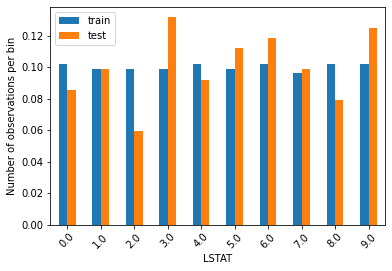

In [156]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

# LSTAT

t1 = train_t.groupby(['LSTAT'])['LSTAT'].count() / len(train_t)
t2 = test_t.groupby(['LSTAT'])['LSTAT'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

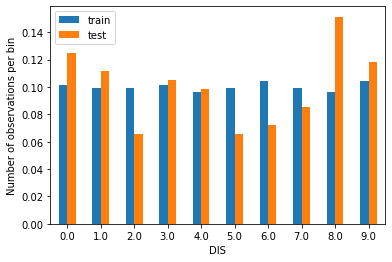

In [157]:
# DIS

t1 = train_t.groupby(['DIS'])['DIS'].count() / len(train_t)
t2 = test_t.groupby(['DIS'])['DIS'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

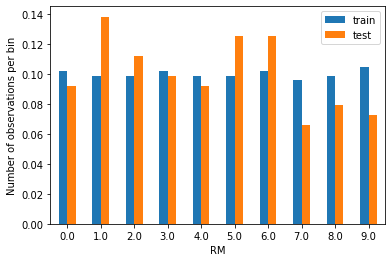

In [158]:
# RM

t1 = train_t.groupby(['RM'])['RM'].count() / len(train_t)
t2 = test_t.groupby(['RM'])['RM'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

## Recipe 39 - Discretization + encoding

In [161]:
from sklearn.model_selection import train_test_split

# from feature-engine

from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.encoding import OrdinalEncoder


In [162]:
# boston.csv in local file 
data = pd.read_csv('boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [163]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

## Equal-frequency discretization with Feature-engine

In [164]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [165]:
# with feature engine we can automate the process for many variables
# in one line of code

disc = EqualFrequencyDiscretiser(
    q=10, variables=['LSTAT', 'DIS', 'RM'], return_object=True)

disc.fit(X_train)

EqualFrequencyDiscretiser(return_object=True, variables=['LSTAT', 'DIS', 'RM'])

In [166]:
# transform train and test

train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

Text(0, 0.5, 'mean of survived')

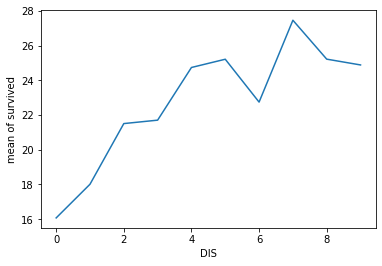

In [167]:
# let's explore if the bins have a linear relationship
# with the target: we see they don't

pd.concat([train_t, y_train], axis=1).groupby('DIS')['MEDV'].mean().plot()
plt.ylabel('mean of survived')

In [170]:
# let's order the bins

enc = OrdinalEncoder(encoding_method = 'ordered',  variables=['LSTAT', 'DIS', 'RM'])

enc.fit(train_t, y_train)

OrdinalEncoder(variables=['LSTAT', 'DIS', 'RM'])

In [171]:
# we can fnd the list of encoded variables here
enc.variables

['LSTAT', 'DIS', 'RM']

In [172]:
# we can find a list of the re-ordered bins mappings here
enc.encoder_dict_

{'LSTAT': {9: 0, 8: 1, 7: 2, 6: 3, 5: 4, 4: 5, 3: 6, 2: 7, 1: 8, 0: 9},
 'DIS': {0: 0, 1: 1, 2: 2, 3: 3, 6: 4, 4: 5, 9: 6, 5: 7, 8: 8, 7: 9},
 'RM': {0: 0, 1: 1, 2: 2, 3: 3, 5: 4, 6: 5, 4: 6, 7: 7, 8: 8, 9: 9}}

In [173]:
# let's transformt the data sets
train_t = enc.transform(train_t)
test_t = enc.transform(test_t)

Text(0, 0.5, 'mean of survived')

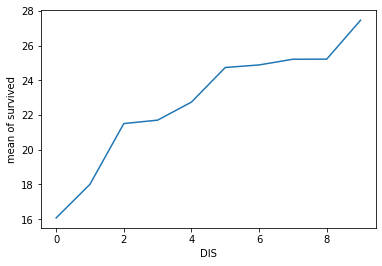

In [174]:
# let's explore the monotonic relationship between bins and target

pd.concat([train_t, y_train], axis=1).groupby('DIS')['MEDV'].mean().plot()
plt.ylabel('mean of survived')

## Additional Recipe - Use of KBinsDiscretizer

In [189]:
# Author: Andreas Müller
#         Hanmin Qin <qinhanmin2005@sina.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor


In [191]:
# construct the dataset
rnd = np.random.RandomState(42)
X = rnd.uniform(-3, 3, size=100)
y = np.sin(X) + rnd.normal(size=len(X)) / 3
X = X.reshape(-1, 1)


In [193]:
# transform the dataset with KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=10, encode="onehot")
X_binned = enc.fit_transform(X)

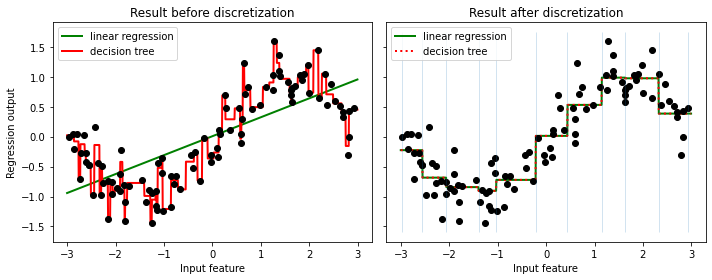

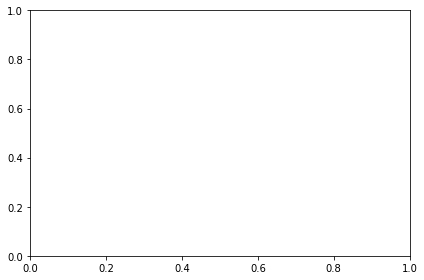

In [204]:
# predict with original dataset
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10, 4))
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = LinearRegression().fit(X, y)
ax1.plot(line, reg.predict(line), linewidth=2, color="green", label="linear regression")
reg = DecisionTreeRegressor(min_samples_split=3, random_state=0).fit(X, y)
ax1.plot(line, reg.predict(line), linewidth=2, color="red", label="decision tree")
ax1.plot(X[:, 0], y, "o", c="k")
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")

# predict with transformed dataset
line_binned = enc.transform(line)
reg = LinearRegression().fit(X_binned, y)
ax2.plot(
    line,
    reg.predict(line_binned),
    linewidth=2,
    color="green",
    linestyle="-",
    label="linear regression",
)

reg = DecisionTreeRegressor(min_samples_split=3, random_state=0).fit(X_binned, y)
ax2.plot(
    line,
    reg.predict(line_binned),
    linewidth=2,
    color="red",
    linestyle=":",
    label="decision tree",
)

ax2.plot(X[:, 0], y, "o", c="k")
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=0.2)
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")

plt.tight_layout()
plt.show()

ax2.plot(X[:, 0], y, "o", c="k")
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=0.2)
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")

plt.tight_layout()
plt.show()
